In [76]:
import scanpy as sc
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
import scib_metrics
from scib_metrics.benchmark import Benchmarker

In [78]:
methods = ['bcd_umap', 'pca_umap', 'harmony_umap', 'seurat_umap']
method_names = {'bcd_umap': 'BCD', 'pca_umap': 'Uncorrected', 'harmony_umap': 'Harmony', 'seurat_umap': 'Seurat (CCA)'}
sample = 'lung'

metadata = pd.read_csv(f"../output-embeddings/lung_label.csv", index_col=0)

In [79]:
embs = {}
for m in methods:
    embs[m] = pd.read_csv(f"../output-embeddings/{sample}_{m}.csv", index_col=0)

In [80]:
adata = sc.AnnData(np.zeros([len(metadata), 0]), obs=metadata)
adata

AnnData object with n_obs × n_vars = 36807 × 0
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'percent.mito', 'Sample', 'Age', 'Tissue', 'S.Score', 'G2M.Score', 'Phase', 'Cell_group', 'Cell_type'

In [81]:
for m in methods:
    matrix_name = m
    adata.obsm[matrix_name] = embs[m].to_numpy()

In [82]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nGene,nUMI,percent.mito,Sample,Age,Tissue,S.Score,G2M.Score,Phase,Cell_group,Cell_type
S1_AAACCTGAGACACTAA,S1,5632,1952,1953,5633,0.012784,W11.5_distal,11.5,Distal,-0.046908,-0.077983,G1,Mesenchymal,Mesenchyme RSPO2+
S1_AAACCTGAGCGAGAAA,S1,6451,2239,2240,6452,0.028213,W11.5_distal,11.5,Distal,-0.056338,-0.140219,G1,Epithelial,Bud tip adjacent
S1_AAACCTGAGCTGTCTA,S1,4535,1632,1632,4535,0.013451,W11.5_distal,11.5,Distal,-0.091739,-0.049582,G1,Mesenchymal,Mesenchyme RSPO2+
S1_AAACCTGAGGTTACCT,S1,4228,1541,1543,4230,0.016556,W11.5_distal,11.5,Distal,-0.129946,-0.078479,G1,Mesenchymal,Mesenchyme RSPO2+
S1_AAACCTGAGTGTGGCA,S1,14340,3633,3635,14342,0.019805,W11.5_distal,11.5,Distal,0.232330,0.458178,G2M,Mesenchymal,Mesenchyme RSPO2+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S8_TTTGTCAAGTGACTCT,S8,12476,3806,3807,12477,0.043524,W21_trachea,21.0,Trachea,-0.204046,-0.103055,G1,Epithelial,Multiciliated cell
S8_TTTGTCACAGGGTACA,S8,12211,2859,2860,12212,0.019573,W21_trachea,21.0,Trachea,-0.069373,-0.078622,G1,Immune,"Hematopoietic, Macrophage"
S8_TTTGTCAGTGCAACTT,S8,48891,5320,5322,48893,0.030353,W21_trachea,21.0,Trachea,0.367777,0.511558,G2M,RBC,RBC
S8_TTTGTCATCACTATTC,S8,10097,2972,2974,10099,0.033970,W21_trachea,21.0,Trachea,-0.081059,-0.060335,G1,Epithelial,Basal cell


C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


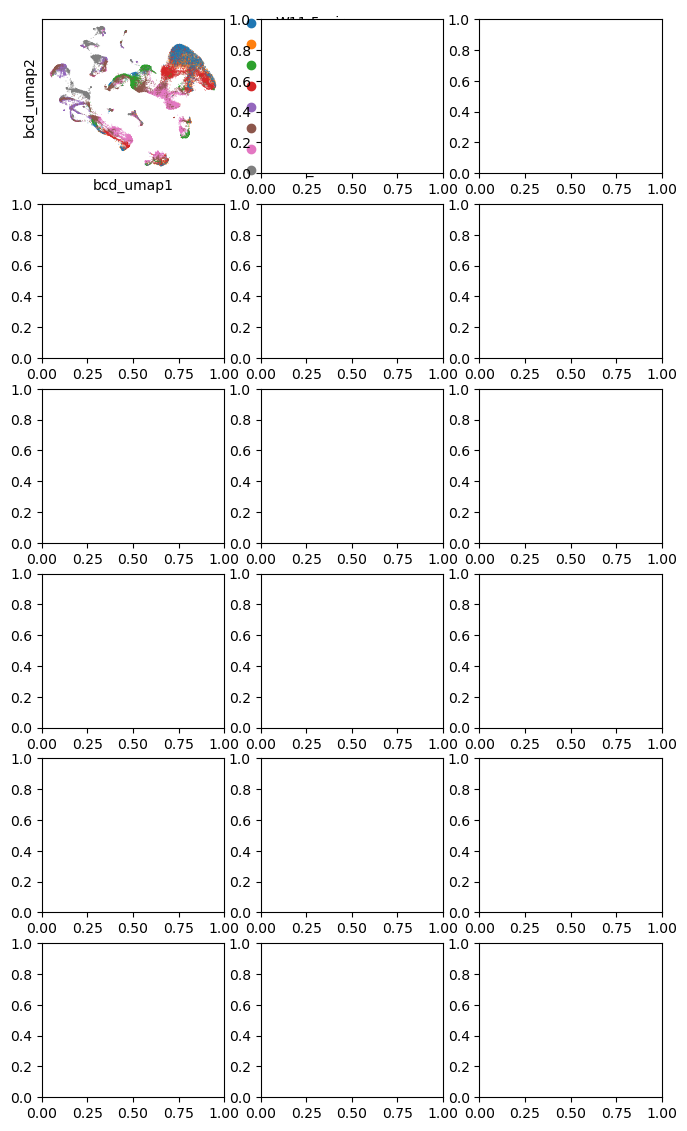

C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatte

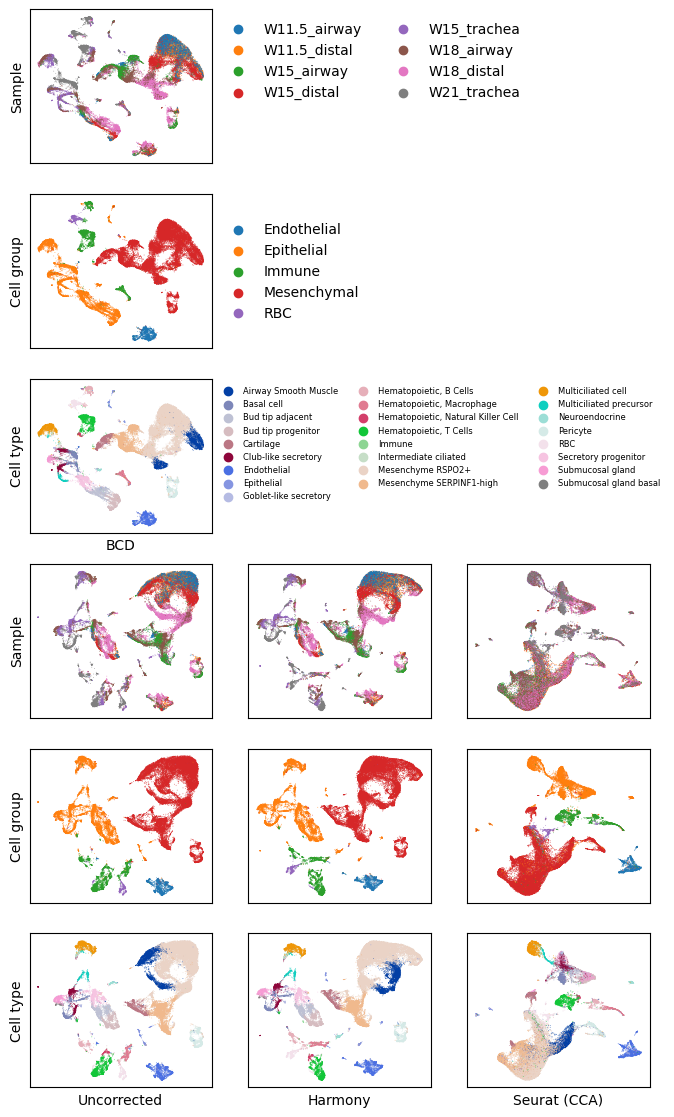

<Figure size 640x480 with 0 Axes>

In [86]:
fig, axes = plt.subplots(6, 3, figsize=(8, 14))
for i, m in enumerate(methods):
    legend_loc = None
    if i == 0:
        legend_loc = 'right margin'
    j = i
    k = 0
    if j >= 1:
        k = 1
        j = j - 1
    sc.pl.embedding(adata, m, color='Sample', ax=axes[k * 3][j], legend_loc=legend_loc, title='', legend_fontsize=10, 
                    alpha=0.75, size=1.5)
    sc.pl.embedding(adata, m, color='Cell_group', ax=axes[k * 3 + 1][j], legend_loc=legend_loc, title='', legend_fontsize=10, 
                    alpha=0.75, size=1.5)
    sc.pl.embedding(adata, m, color='Cell_type', ax=axes[k * 3 + 2][j], legend_loc=legend_loc, title='', legend_fontsize=6, 
                    alpha=0.75, size=1.5)
    if i == 0:
        axes[(i // 4) * 3][i % 3].legend(ncol=2, bbox_to_anchor=(1., 1.), frameon=False, fontsize=10)
        # axes[(i // 4) * 3 + 1][i % 4].legend(ncol=1, bbox_to_anchor=(1., 1.), frameon=False, fontsize=10)
        axes[(i // 4) * 3 + 2][i % 4].legend(ncol=3, bbox_to_anchor=(1., 1.), frameon=False, fontsize=6)
    axes[k * 3][j].set_xlabel('')
    axes[k * 3 + 1][j].set_xlabel('')
    axes[k * 3 + 2][j].set_xlabel(method_names[m])
    
    if j == 0:
        axes[k * 3][j].set_ylabel('Sample')
        axes[k * 3 + 1][j].set_ylabel('Cell group')
        axes[k * 3 + 2][j].set_ylabel('Cell type')
    else:
        axes[k * 3][j].set_ylabel('')
        axes[k * 3 + 1][j].set_ylabel('')
        axes[k * 3 + 2][j].set_ylabel('')
    
for i in range(1, 3):
    axes[(i // 4) * 3][i % 3].set_axis_off()
    axes[(i // 4) * 3 + 1][i % 3].set_axis_off()
    axes[(i // 4) * 3 + 2][i % 3].set_axis_off()
plt.tight_layout(pad=.5)
fig

In [87]:
fig.savefig("../figures/lung.png", dpi=300, bbox_inches='tight')

C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


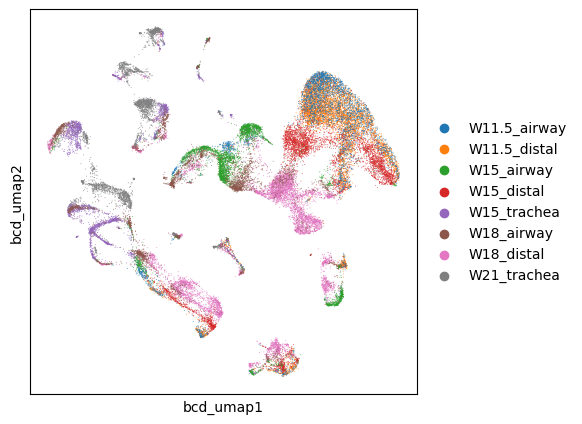

In [74]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata, 'bcd_umap', color='Sample', ax=ax, legend_loc='right margin', title='', legend_fontsize=10, alpha=0.75, size=2.)
ax.set_xlabel("")
ax.set_ylabel("")

fig
fig.savefig("../figures/lung_main.png", dpi=300, bbox_inches='tight')

C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


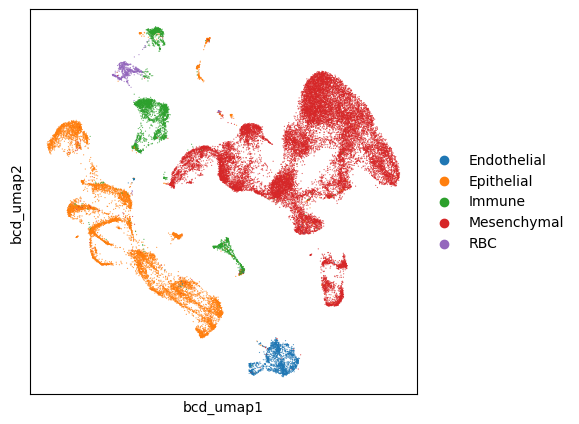

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata, 'bcd_umap', color='Cell_group', ax=ax, legend_loc='right margin', title='', legend_fontsize=10, alpha=0.75, size=3.)
ax.set_xlabel("")
ax.set_ylabel("")

fig

C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


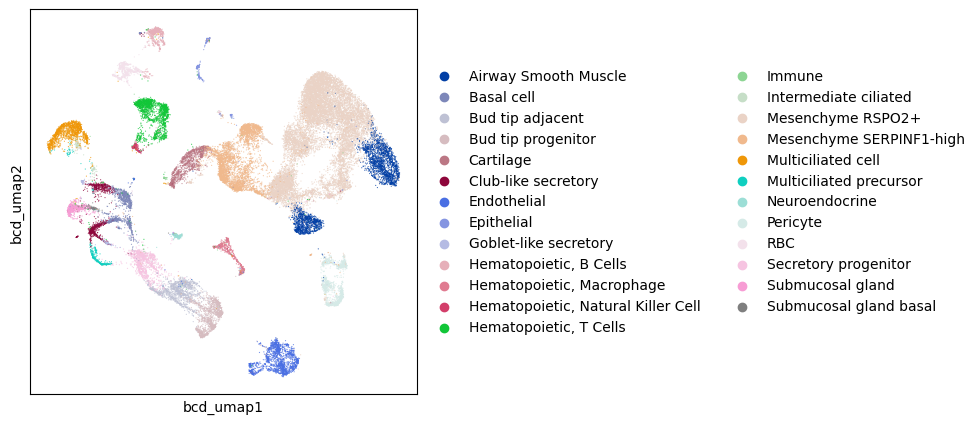

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata, 'bcd_umap', color='Cell_type', ax=ax, legend_loc='right margin', title='', legend_fontsize=10, alpha=0.75, size=3.)
ax.set_xlabel("")
ax.set_ylabel("")

fig

C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


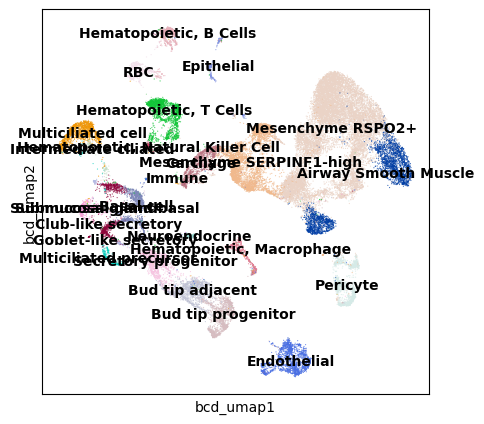

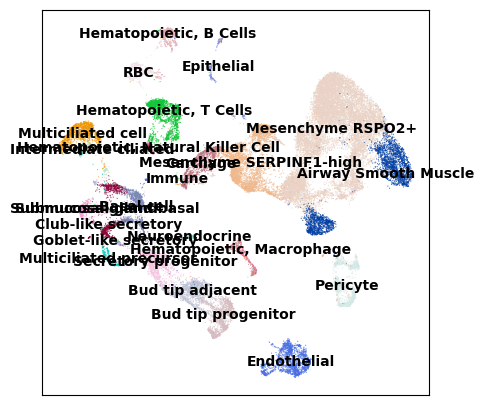

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata, 'bcd_umap', color='Cell_type', ax=ax, legend_loc='on data', title='', legend_fontsize=10, alpha=0.75, size=3.)
ax.set_xlabel("")
ax.set_ylabel("")

fig